In [ ]:
import numpy as np 
import matplotlib.pyplot as mtlb
import cv2 as cv
from PIL import Image as im
from datetime import datetime
import time 
from pygame import mixer

In [4]:
print(cv. __version__)

4.7.0


In [5]:
# reading the network
yolo = cv.dnn.readNet(r"C:\Users\Ayush\Desktop\EyeGen-main\yolov3.weights",
                      r"C:\Users\Ayush\Desktop\EyeGen-main\yolov3.cfg")

In [6]:
classes = []
with open(r"C:\Users\Ayush\Desktop\EyeGen-main\coco.names", 'r') as f:
    classes = f.read().splitlines()

In [7]:
def processing(lis={}):
    mixer.init()

    if "tvmonitor" in lis.keys():
        if (lis["tvmonitor"] > 4):
            mixer.music.load("Computer_Lab.mp3")

    elif "bench" in lis.keys():
        if (lis["bench"] > 4):
            mixer.music.load("Classroom.mp3")

    elif "chair" in lis.keys():
        if (lis["chair"] > 4):
            mixer.music.load("Auditorium.mp3")

    elif ("person" in lis.keys() and lis["person"] >= 3):
        mixer.music.load("Crowd.mp3")

    elif (("car" in lis.keys()) or ("motorbike" in lis.keys()) or ("bus" in lis.keys()) or ("truck" in lis.keys()) or ("traffic light" in lis.keys())):
        mixer.music.load("Road.mp3")

    else:
        mixer.music.load("Unable.mp3")
    mixer.music.play()
    time.sleep(3)

In [8]:
def image_capture():
    current_time = datetime.now()
    print(type(current_time))
    cap = cv.VideoCapture(0)
    dic = {}

    while True:

        ret, img = cap.read()
        # cv.imshow('Input',img)
        c = cv.waitKey(1)

        if c == 27:
            break

        height, width, _ = img.shape
        # converting to normal frame
        # grey scale
        blob = cv.dnn.blobFromImage(
            img, 1/255, (320, 320), (0, 0, 0), swapRB=True, crop=False)
        # mtlb.imshow(blob)

        # print frame0
        i = blob[0].reshape(320, 320, 3)
        mtlb.imshow(i)

        yolo.setInput(blob)
        output_layes_name = yolo.getUnconnectedOutLayersNames()
        layeroutput = yolo.forward(output_layes_name)

        boxs = []
        confidences = []
        class_ids = []
        for output in layeroutput:
            for detection in output:
                score = detection[5:]
                class_id = np.argmax(score)
                confidence = score[class_id]
                if confidence > 0.7:
                    center_x = int(detection[0]*width)
                    center_y = int(detection[0]*height)
                    w = int(detection[0]*width)
                    h = int(detection[0]*height)
                    x = int(center_x - w/2)
                    y = int(center_y - h/2)

                    boxs.append([x, y, w, h])
                    confidences.append(float(confidence))
                    class_ids.append(class_id)

        len(boxs)
        indexes = cv.dnn.NMSBoxes(boxs, confidences, 0.5, 0.4)

        font = cv.FONT_HERSHEY_COMPLEX
        colors = np.random.uniform(0, 255, size=(len(boxs), 3))

        dici = {}
        for i in indexes.flatten():
            x, y, w, h = boxs[i]
            label = str(classes[class_ids[i]])
            confi = str(round(confidences[i], 2))
            color = colors[i]
            if (label in dic) and (label in dici):
                dic[label] = max(dic[label], dici[label])
                dici[label] = dici[label] + 1
            else:
                dici[label] = 1

            cv.rectangle(img, (x, y), (x+w, y+h), color, 1)
            cv.putText(img, label + " "+confi, (x, y+20),
                       font, 2, (255, 255, 255), 1)
            cv.imshow('video', img)

        for a in dici:
            if a in dic:
                dic[a] = max(dic[a], dici[a])
            else:
                dic[a] = dici[a]

        print(dic)
        mtlb.imshow(img)

        print((datetime.now() - current_time).total_seconds())
        if (((datetime.now() - current_time).total_seconds()) > 5):
            processing(dic)
            current_time = datetime.now()
            dic = {}

In [9]:
def main_task():
    image_capture()

<class 'datetime.datetime'>
{'person': 1}
7.617511
{'person': 1}
0.909795
{'person': 2}
1.733821
{'person': 2}
2.440268
{'person': 2}
3.160477
{'person': 2}
3.974971
{'person': 2}
4.727432
{'person': 2}
7.223634
{'person': 1}
0.740206
{'person': 2}
1.455446
{'person': 2}
2.29851
{'person': 2}
3.147367
{'person': 2}
4.002744
{'person': 3}
4.833099
{'person': 3}
5.634842
{'person': 1}
0.867239
{'person': 2}
1.626354
{'person': 2}
2.346941
{'person': 2}
3.129248
{'person': 2}
3.855025
{'person': 2}
4.573724
{'person': 3}
5.263353
{'person': 1}
0.74297
{'person': 2}
1.49228
{'person': 3}
2.204414
{'person': 3}
2.908412
{'person': 3}
3.580597
{'person': 3}
4.263754
{'person': 3}
4.955079
{'person': 3}
5.701029
{'person': 1}
0.69392
{'person': 2}
1.411762
{'person': 2}
2.128914
{'person': 2}
2.892914
{'person': 3}
3.667842
{'person': 3}
4.333464
{'person': 3}
5.075573
{'person': 1}
0.755044
{'person': 2}
1.482243
{'person': 2}
2.211993
{'person': 2}
2.959923
{'person': 2}
3.670199
{'person':

AttributeError: 'tuple' object has no attribute 'flatten'

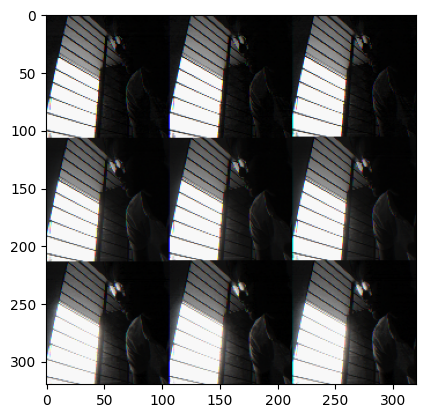

In [10]:
if __name__ == "__main__":
    main_task()

# NLP Code to generate voice responce

In [1]:
from gtts import gTTS
import os

In [2]:
mytext = "Hi, this is an example of converting text to audio. This is a bot speaking here, not a real human!"
audio = gTTS(text=mytext, lang="en", slow=False)

In [ ]:
audio.save("example.mp3")

In [ ]:
os.system("start example.mp3")

# Arduino Code for GPS

In [ ]:
# #include<SoftwareSerial.h>
# SoftwareSerial NEO6M(2,3);

# void setup(){
#   Serial.begin(115200);

#   NEO6M.begin(9600);

# }

# void loop(){
#   while(NEO6M.available()>0){
#     Serial.write(NEO6M.read());
#   }
# }